https://github.com/douxiaoya83-oss/individual_project.git

## Data description

#### `players.csv`: 196 observations and 7 variables describing player characteristics.
+ `experience`, Character, experience level of each player, which includes `Beginner`, `Amateur`, `Regular`, `Pro`, and `Veteran`.
+ `subscribe`, Logical, wheather the player subscribe the game newsletter
+ `hashedEmail`, Character, recorded email addresses of players
+ `played_hours`, Double, total number of hours the player has spent playing games
+ `name`, Character, name of player
+ `gender`, Character, gender of player, eg. `Female`, `Male`, `Non-binary`
+ `Age`, Double, age of player

#### `sessions.csv`: 1536 observations and 5 variables describing gameplay sessions.
+ `hashedEmail`, Character, recorded email addresses of players
+ `start_time`, Character, local time when the session began
+ `end_time`, Character, local time when the session ended
+ `original_start_time`, Double, Unix-style timestamp when the session began
+ `original_end_time`, Double, Unix-style timestamp when the session ended

### Potential Issues: 
1. `Ages` has missing datas and outliers
2. The data type of `experience`, `gender` are character, which is not the correct as predictors


## Questions

Broad research question:  **Question 2**  
Specifically speaking, **can player characteristics predict the total number a player spends on the server?**


I would like to use `experience`, `gender` and `Age` as **explanatory variables** to predict the **response variable** `played_hours`.

To address this question, I will use the `players.csv` datasets. Before modeling, I will deal with the data for missing or outliers, and convert categorical variables (character) into factors. 

## Exploratory Data Analysis and Visualization

In [28]:
library(tidyverse)
players_url = "https://drive.google.com/uc?export=download&id=1uLgyqhTWde6lDwTPmpDHTHndMKkr0eGn"
sessions_url = "https://drive.google.com/file/uc?export=download&id=1GP6no3RM0GQbFV2S2jV_kcG0cUNzMIb7"
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ERROR: Error in open.connection(structure(6L, class = c("curl", "connection"), conn_id = <pointer: 0x292>), : HTTP error 404.


In [29]:
players <- players |>
  mutate(experience = as_factor(experience),
         gender = as_factor(gender))

players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [30]:
players_mean <- players |>
  summarize(average_age = mean(Age, na.rm = TRUE),
            average_played_hours = mean(played_hours, na.rm = TRUE))
players_mean

average_age,average_played_hours
<dbl>,<dbl>
21.13918,5.845918


Generate a Table of mean value for each quantitative variable:

| Variable    | Mean Value |
| -------- | ------- |
| Age      | 21.14 years |
| played_hours | 6.42 hours |

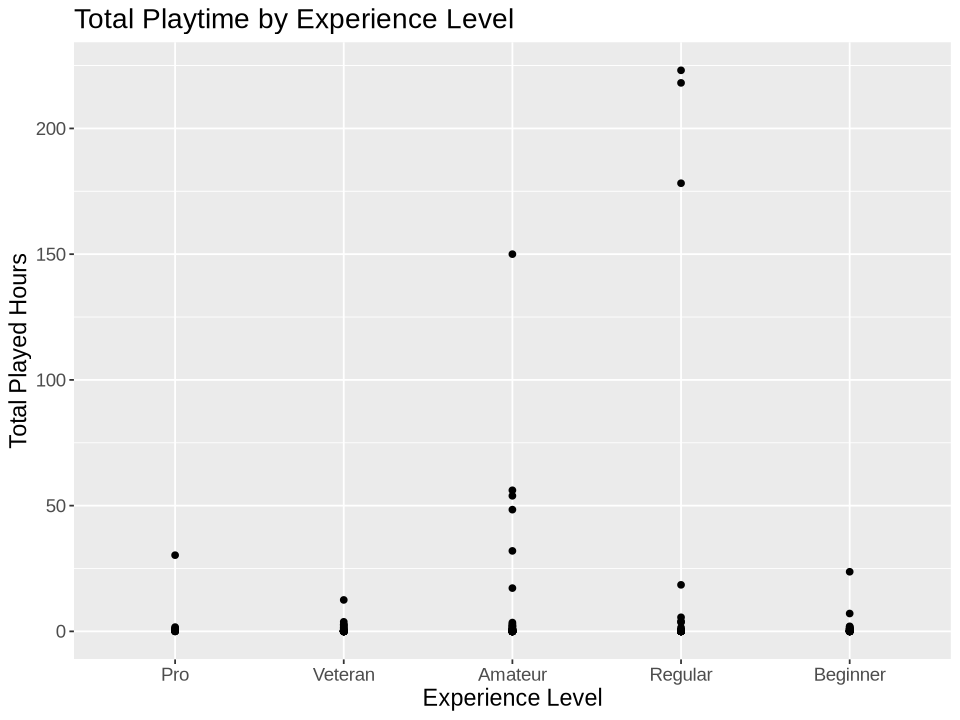

In [31]:
ggplot(players, aes(x = experience, y = played_hours)) +
  geom_point() +
  labs(title = "Total Playtime by Experience Level",
       x = "Experience Level", y = "Total Played Hours") +
  theme(text = element_text(size = 14))

The Amateur group shows the widest spread of total playtime, which may cover a wide range of player engagement levels. A few players in the Amateur and Regular groups have extremely high playtime, which are considered as outliers.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


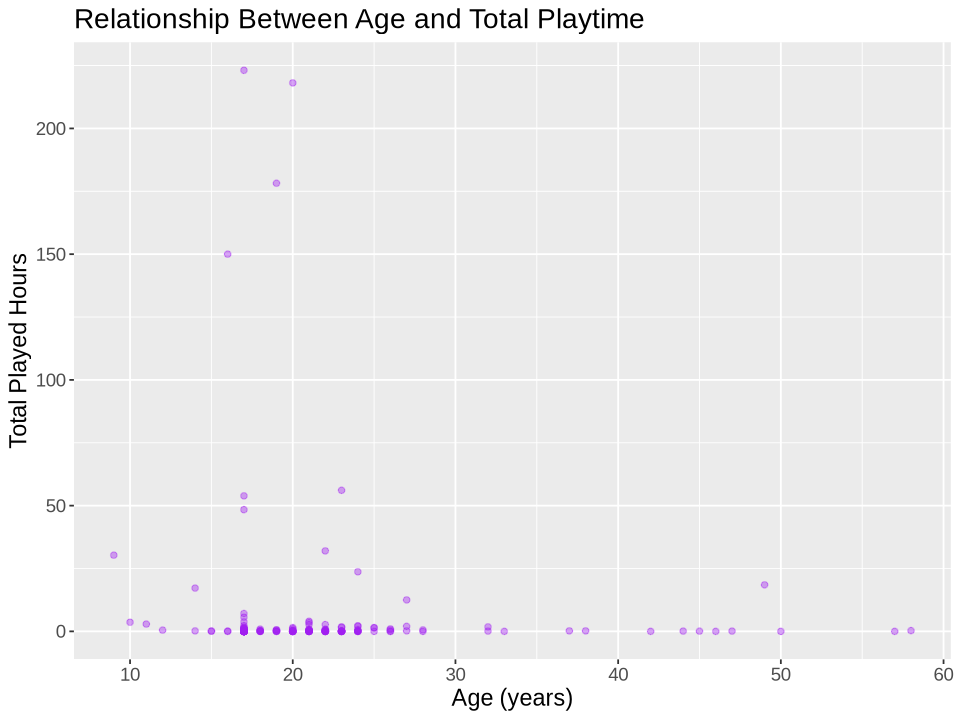

In [33]:
ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4, color = "purple") +
  labs(title = "Relationship Between Age and Total Playtime",
       x = "Age (years)", y = "Total Played Hours") +
  theme(text = element_text(size = 14))

The plot shows no clear linear relationship between age and total playtime, suggesting age is a weak predictor of playtime. Most high-hour players are under 25, and a few extreme values are considered as outliers.

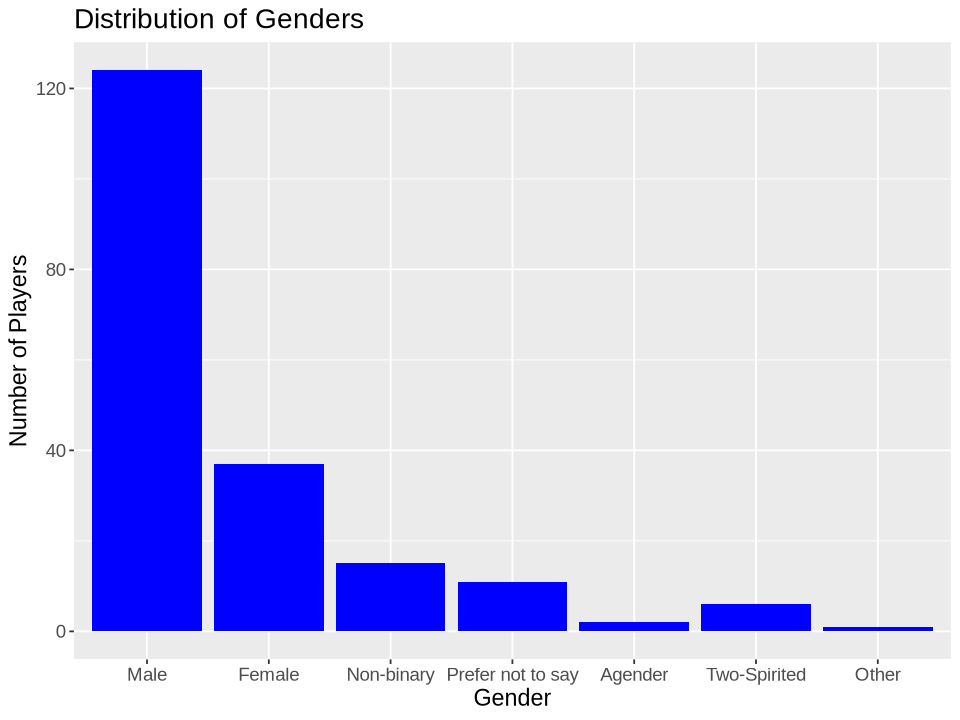

In [9]:
options(repr.plot.width = 8, repr.plot.height = 6)
ggplot(players, aes(x = gender)) +
  geom_bar(fill = "blue") +
  labs(title = "Distribution of Genders",
       x = "Gender", y = "Number of Players") +
  theme(text = element_text(size = 14))

The dataset shows that male players make up the majority, followed by female players, then other genders. This unbalanced distribution suggests that most playtime will be influenced by male participants.